In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
    counts = df['Class'].value_counts()
    return counts[1]/(counts[1]+counts[0])
    raise NotImplementedError()
answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    dummy = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    predictions =dummy.predict(X_test)
    return accuracy_score(y_test, predictions), recall_score(y_test, predictions)
    
    raise NotImplementedError()
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score,accuracy_score
    from sklearn.svm import SVC
    svc = SVC().fit(X_train, y_train)
    predictions = svc.predict(X_test)
    return accuracy_score(y_test, predictions), recall_score(y_test, predictions), precision_score(y_test, predictions)
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    svc = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    decision_function_values = svc.decision_function(X_test)
    y_pred = (decision_function_values > -220).astype(int)
    confusion = confusion_matrix( y_test, y_pred)
    return confusion
answer_four()

array([[5320,   24],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train. This classifier should use the parameter solver='liblinear'.

For the logisitic regression classifier, compute the scores using decision_function() or with predict_proba(), then create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

Note: When getting the ROC curve and finding the records where the FPR entry is closest to 0.16, take the corresponding TPRs. As there are two such records where the FPR is close to 0.16, take the higher TPR of these two records.

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

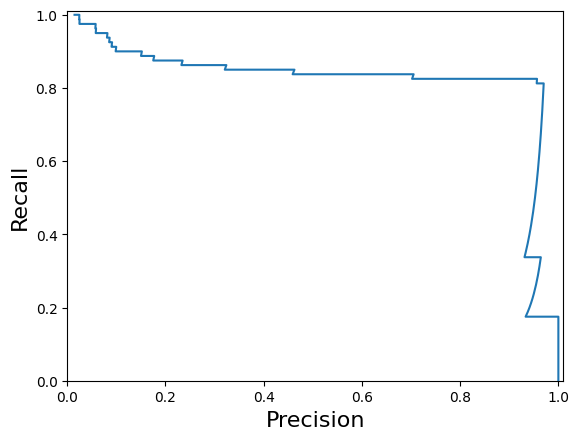

(0.825, 0.9375)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
def answer_five():
    
    clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
    predictions = clf.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, predictions)
    fpr, tpr, _ = roc_curve(y_test, predictions)
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.show()
    target_recall = recall[np.where(precision==0.75)][0]
    closest_zero = np.argmin(np.abs(thresholds))
    target_tpr = tpr[np.argmin(np.abs(fpr - 0.16))]

    return (target_recall, target_tpr)

answer_five()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [19]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    param_grid = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]}

    linreg = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
    grid =GridSearchCV(linreg, scoring = 'recall', param_grid=param_grid,cv = 3)
    grid.fit(X_train, y_train)
    y_decision_fn_scores_acc = grid.decision_function(X_test) 

    print('Grid best parameter (max. accuracy): ', grid.best_params_)
    print('Grid best score (accuracy): ', grid.best_score_)
    output = grid.cv_results_['mean_test_score'].reshape(-1,2)

   
    
    return output
   #.reshape(-1,2)
    
    return output
    # YOUR CODE HERE
answer_six()

Grid best parameter (max. accuracy):  {'C': 1, 'penalty': 'l1'}
Grid best score (accuracy):  0.8115942028985508


array([[0.66666667, 0.76086957],
       [0.80072464, 0.80434783],
       [0.8115942 , 0.8115942 ],
       [0.80797101, 0.8115942 ]])

Grid best parameter (max. accuracy):  {'C': 1, 'penalty': 'l1'}
Grid best score (accuracy):  0.8115942028985508


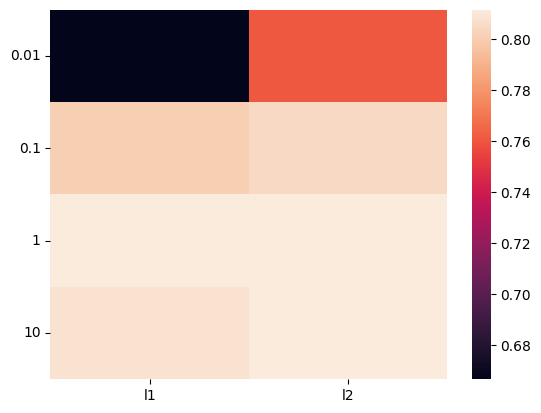

In [27]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);
    plt.show()
GridSearch_Heatmap(answer_six())
